In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

Using TensorFlow backend.


In [2]:
# Importing the data

df = pd.read_csv(r"C:\Users\USER\Desktop\Case studies\ANN\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [7]:
df['Gender'] = df['Gender'].map({'Female':0 , 'Male':1})

In [8]:
df['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [9]:
X = df['Geography']

In [10]:
dummy = pd.get_dummies(X , drop_first=True)

In [11]:
df = pd.concat([dummy,df] , axis=1)

In [12]:
df.drop("Geography",axis=1,inplace=True)

In [13]:
df.head()

,Germany,Spain,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1
1,0,1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0
2,0,0,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1
3,0,0,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0
4,0,1,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0


In [14]:
data = df

In [15]:
data.drop('RowNumber' , inplace=True , axis=1)
data.drop('Surname' , inplace=True , axis=1)

In [16]:
data.head()

,Germany,Spain,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1
1,0,1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0
2,0,0,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1
3,0,0,15701354,699,0,39,1,0.00,2,0,0,93826.63,0
4,0,1,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
data.drop('CustomerId' , inplace=True , axis=1)

In [18]:
data.head()

,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,619,0,42,2,0.00,1,1,1,101348.88,1
1,0,1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,0,0,502,0,42,8,159660.80,3,1,0,113931.57,1
3,0,0,699,0,39,1,0.00,2,0,0,93826.63,0
4,0,1,850,0,43,2,125510.82,1,1,1,79084.10,0


In [19]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [20]:
dummy2 = pd.get_dummies(data['NumOfProducts'] , drop_first=True)

In [21]:
data = pd.concat([dummy2 , data],axis=1)

In [22]:
data.drop('NumOfProducts', inplace=True , axis=1)

In [23]:
data.head()

,2,3,4,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,0,0,619,0,42,2,0.00,1,1,101348.88,1
1,0,0,0,0,1,608,0,41,1,83807.86,0,1,112542.58,0
2,0,1,0,0,0,502,0,42,8,159660.80,1,0,113931.57,1
3,1,0,0,0,0,699,0,39,1,0.00,0,0,93826.63,0
4,0,0,0,0,1,850,0,43,2,125510.82,1,1,79084.10,0


In [24]:
X = data.drop('Exited',axis=1).values
y = data['Exited'].values

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from keras.layers import Dense,Dropout
from keras.models import Sequential

In [31]:
X_train.shape

(7000, 13)

In [32]:
model = Sequential()

model.add(Dense(input_dim = X_train.shape[1] , units = 15 , activation = 'relu' , kernel_initializer = 'random_uniform'))


model.add(Dense(units = 15 , activation = 'relu' , kernel_initializer = 'random_uniform'))


model.add(Dense(units = 1 , activation = 'sigmoid' , kernel_initializer = 'random_uniform'))


model.compile(optimizer='adam',loss='binary_crossentropy' , metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100,batch_size=32 , validation_data=[X_test,y_test])

Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 1s 112us/step - loss: 0.5537 - accuracy: 0.7893 - val_loss: 0.4482 - val_accuracy: 0.8053
Epoch 2/100
7000/7000 [==============================] - 1s 72us/step - loss: 0.4309 - accuracy: 0.8054 - val_loss: 0.3987 - val_accuracy: 0.8310
Epoch 3/100
7000/7000 [==============================] - 1s 72us/step - loss: 0.4029 - accuracy: 0.8300 - val_loss: 0.3836 - val_accuracy: 0.8357
Epoch 4/100
7000/7000 [==============================] - 1s 71us/step - loss: 0.3916 - accuracy: 0.8359 - val_loss: 0.3791 - val_accuracy: 0.8443
Epoch 5/100
7000/7000 [==============================] - 1s 74us/step - loss: 0.3865 - accuracy: 0.8369 - val_loss: 0.3695 - val_accuracy: 0.8463
Epoch 6/100
7000/7000 [==============================] - 1s 74us/step - loss: 0.3824 - accuracy: 0.8373 - val_loss: 0.3695 - val_accuracy: 0.8440
Epoch 7/100
7000/7000 [==============================] - 1s 76us/step - los

7000/7000 [==============================] - 1s 73us/step - loss: 0.3774 - accuracy: 0.8386 - val_loss: 0.3609 - val_accuracy: 0.8473
Epoch 57/100
7000/7000 [==============================] - 1s 72us/step - loss: 0.3763 - accuracy: 0.8387 - val_loss: 0.3615 - val_accuracy: 0.8493
Epoch 58/100
7000/7000 [==============================] - 0s 71us/step - loss: 0.3765 - accuracy: 0.8411 - val_loss: 0.3605 - val_accuracy: 0.8483
Epoch 59/100
7000/7000 [==============================] - 1s 72us/step - loss: 0.3762 - accuracy: 0.8406 - val_loss: 0.3618 - val_accuracy: 0.8457
Epoch 60/100
7000/7000 [==============================] - 0s 71us/step - loss: 0.3758 - accuracy: 0.8390 - val_loss: 0.3603 - val_accuracy: 0.8487
Epoch 61/100
7000/7000 [==============================] - 0s 71us/step - loss: 0.3758 - accuracy: 0.8407 - val_loss: 0.3611 - val_accuracy: 0.8457
Epoch 62/100
7000/7000 [==============================] - 0s 69us/step - loss: 0.3755 - accuracy: 0.8406 - val_loss: 0.3598 - val_a

In [33]:
df = pd.DataFrame(model.history.history)

In [34]:
df.head()

,val_loss,val_accuracy,loss,accuracy
0,0.448240,0.805333,0.553684,0.789286
1,0.398749,0.831000,0.430938,0.805429
2,0.383578,0.835667,0.402937,0.830000
3,0.379067,0.844333,0.391596,0.835857
4,0.369483,0.846333,0.386459,0.836857


In [35]:
df = df[['val_loss','loss']]

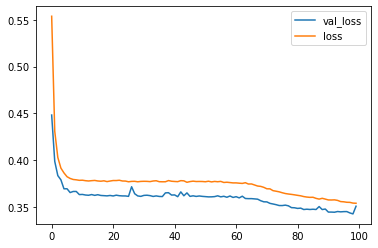

In [36]:
df.plot()

In [37]:
from sklearn import metrics

In [38]:
pred = model.predict_classes(X_test)
metrics.accuracy_score(pred,y_test)

0.8583333333333333

In [39]:
print(metrics.classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      2589
           1       0.49      0.69      0.57       411

    accuracy                           0.86      3000
   macro avg       0.72      0.79      0.74      3000
weighted avg       0.88      0.86      0.87      3000



In [40]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [41]:
print(metrics.confusion_matrix(pred,y_test))

[[2290  299]
 [ 126  285]]
